In [28]:
import pandas as pd    #for working with data in pyhton
import numpy as np
import matplotlib.pyplot as plt     # for visualization
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model




In [3]:
train = pd.read_csv('train (2).csv')
test = pd.read_csv('test (1).csv')

In [4]:
# check out the size of the data
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)


Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [5]:
# look at a few rows using the DataFrame.head() method
# train.head()
print(train.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [6]:
# plotting
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)


In [7]:
print (train.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Skew is: 1.8828757597682129


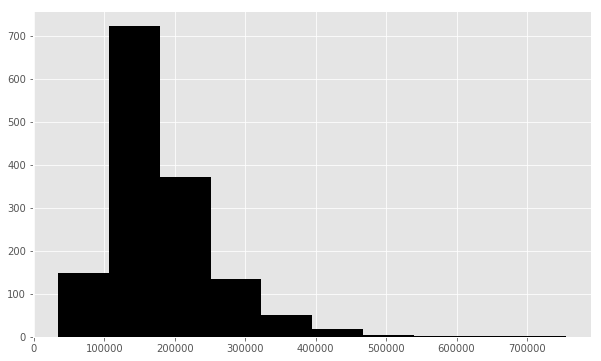

In [12]:
# to plot a histogram of SalePrice
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='black')
plt.show()


 Skew is: 0.12133506220520406


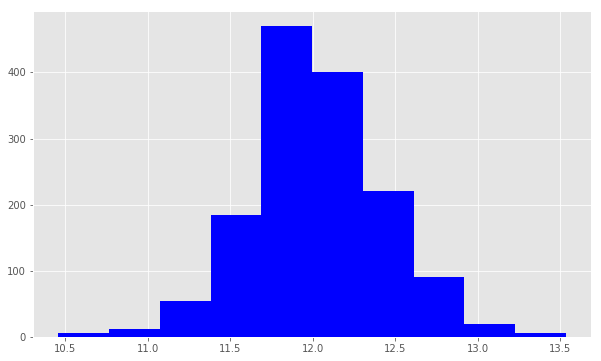

In [13]:
# use np.log() to transform train.SalePric and calculate the skewness a second time as well as re-plot the data
target = np.log(train.SalePrice)
print ("\n Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()


In [16]:
# return a subset of columns matching the specified data types
numeric_features = train.select_dtypes(include=[np.number])
# numeric_features.dtypes
print(numeric_features.dtypes)


Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


In [17]:
# displays the correlation between the columns and examine the correlations between the features and the target.
corr = numeric_features.corr()


In [18]:
# The first five features are the most positively correlated with SalePrice, while the next five are the most negatively correlated.
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 



In [19]:
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [20]:
#to get the unique values that a particular column has.
#train.OverallQual.unique()
print(train.OverallQual.unique())

[ 7  6  8  5  9  4 10  3  1  2]


In [24]:
#investigate the relationship between OverallQual and SalePrice.
#We set index='OverallQual' and values='SalePrice'. We chose to look at the median here.
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
print(quality_pivot)

             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390


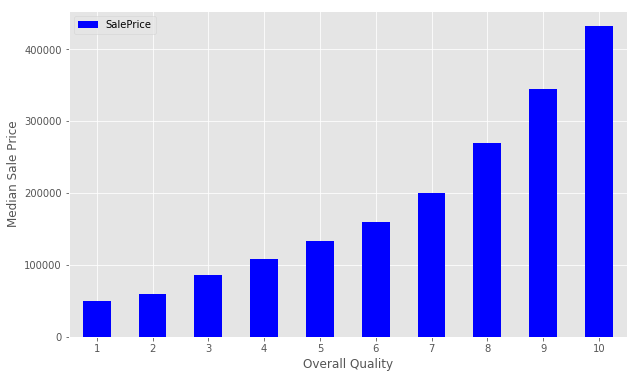

In [25]:
 #visualize this pivot table more easily, we can create a bar plot
#Notice that the median sales price strictly increases as Overall Quality increases.
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

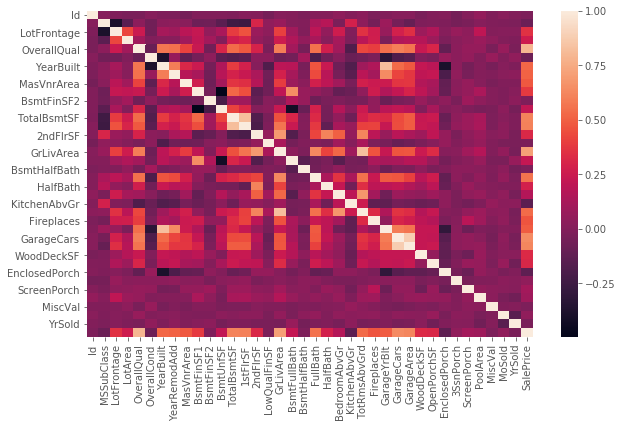

In [27]:
sns.heatmap(corr)

### It's evident from the Heatmap that the major contributiion for the SalesPrice is OverallQual



In [32]:
# create a DataFrame to view the top null columns and return the counts of the null values in each column
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
#nulls
print(nulls)


              Null Count
Feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


In [34]:
# consider the non-numeric features and display details of columns
categoricals = train.select_dtypes(exclude=[np.number])
#categoricals.describe()
print(categoricals.describe())


       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      921        1309      1454      1048   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1455         1455       1455  ...       1374         1374   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1378          225       1257  ...        867          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1374       1374       1455      6    281          53     1455   
unique          5          5          3      3      4           4        9   
top            TA         TA      

In [44]:
#   Dealing with missing values                                                                      #
#   We'll fill the missing values with an average value and then assign the results to data          #
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

# Check if the all of the columns have 0 null values.
# sum(data.isnull().sum() != 0)
print(sum(data.isnull().sum() != 0))

0


###3. Building a linear model    

In [45]:
# separate the features and the target variable for modeling.
# We will assign the features to X and the target variable(Sales Price)to y.

y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)
# exclude ID from features since Id is just an index with no relationship to SalePrice.

#======= partition the data ===================================================================================================#
#   Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before.
#   If we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.
#==============================================================================================================================#
# also state how many percentage from train data set, we want to take as test data set
# In this example, about 33% of the data is devoted to the hold-out set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)


###========= Begin modelling =========================#
#    Linear Regression Model            
#===================================================#

In [46]:
#  first create a Linear Regression model.
# First, we instantiate the model.
lr = linear_model.LinearRegression()


In [47]:
# ---- fit the model / Model fitting
# lr.fit() method will fit the linear regression on the features and target variable that we pass.
model = lr.fit(X_train, y_train)

In [48]:
# ---- Evaluate the performance and visualize results
# r-squared value is a measure of how close the data are to the fitted regression line
# a higher r-squared value means a better fit(very close to value 1)
print("R^2 is: \n", model.score(X_test, y_test))

# use the model we have built to make predictions on the test data set.
predictions = model.predict(X_test)


R^2 is: 
 0.8882477709262531


In [49]:
# calculates the rmse
print('RMSE is: \n', mean_squared_error(y_test, predictions))


RMSE is: 
 0.01784179451956794


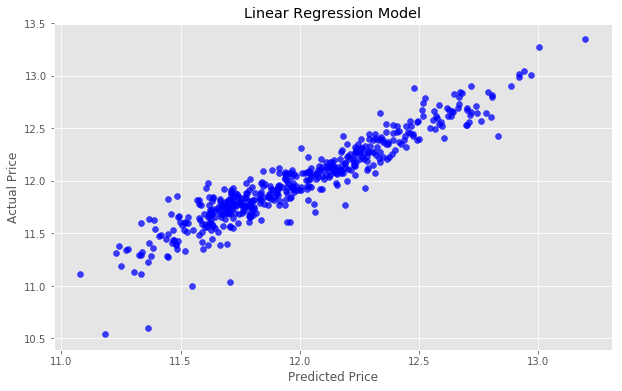

In [50]:
# view this relationship between predictions and actual_values graphically with a scatter plot.
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()